## Loan Approval Prediction

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as -

-> loan_id

-> no_of_dependents - No of dependents on the applicant

-> education - The education level of the applicant

-> self_employed - Employment Status of the Applicant

-> income_annum - Annual Income of the Applicant

-> loan_amount

-> loan_term - Loan Term in Years

-> cibil_score - Credit Score

-> residential_assets_value

-> commercial_assets_value

-> luxury_assets_value

-> bank_asset_value

-> loan_status - (Target variable) - Loan Approval Status

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
hd_data=pd.read_csv('loan_approval_dataset.csv')

In [40]:
hd_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [41]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [42]:
hd_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## EDA

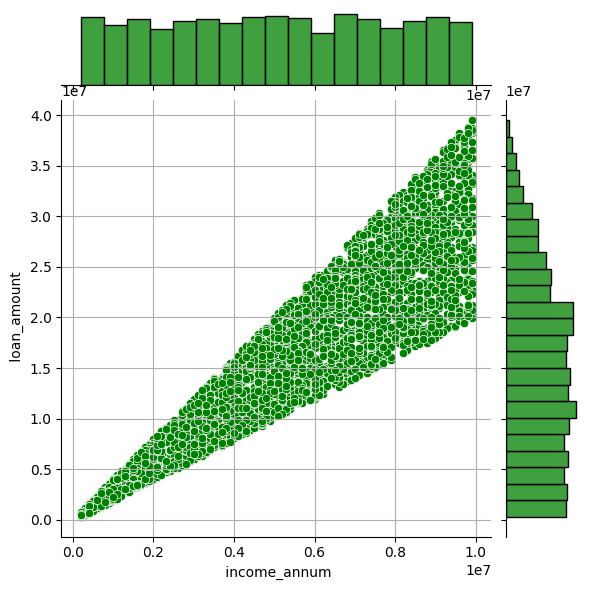

In [43]:
sns.jointplot(x=hd_data[' income_annum'],y=hd_data[' loan_amount'],kind='scatter',color="green")
plt.grid()

**loan amount and income annum are linearly proportional**

<Axes: xlabel=' loan_status', ylabel='count'>

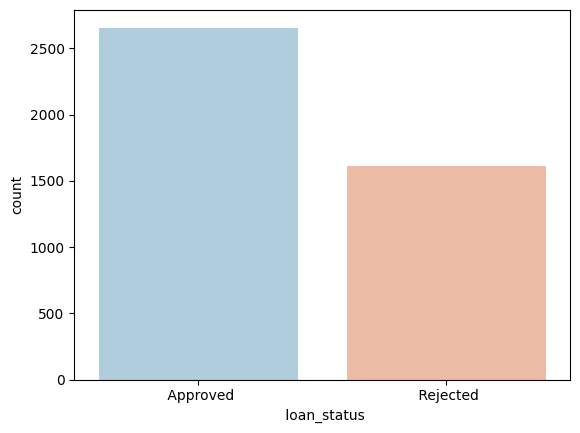

In [28]:
sns.countplot(x = hd_data[' loan_status'],hue = hd_data[' loan_status'],palette='RdBu_r')

**Number of approved loan requests are more than number of rejected loan requests**

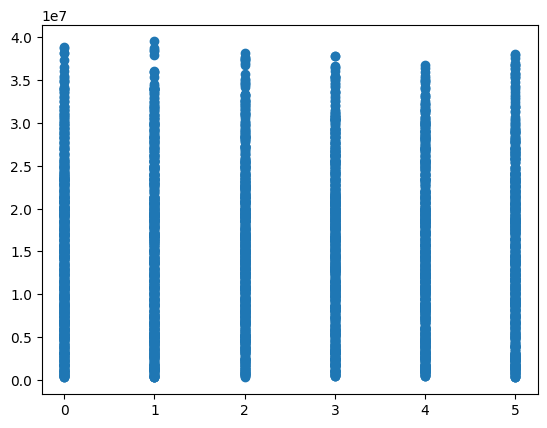

In [32]:
plt.scatter(hd_data[' no_of_dependents'],hd_data[' loan_amount'])

**Number of dependents are constantly proportional to loan amount**

C:\Users\DELL\AppData\Local\Temp\ipykernel_2248\2917173609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' self_employed',data=hd_data,palette='Set2')


<Axes: xlabel=' self_employed', ylabel='count'>

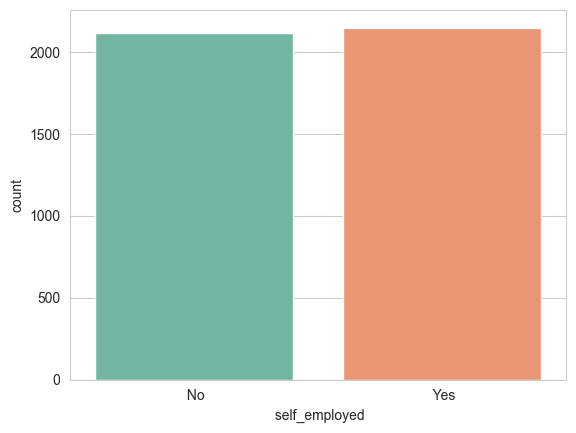

In [43]:
sns.set_style('whitegrid')
sns.countplot(x=' self_employed',data=hd_data,palette='Set2')

**Number of self employed people is greater**

<Axes: xlabel=' cibil_score', ylabel=' loan_amount'>

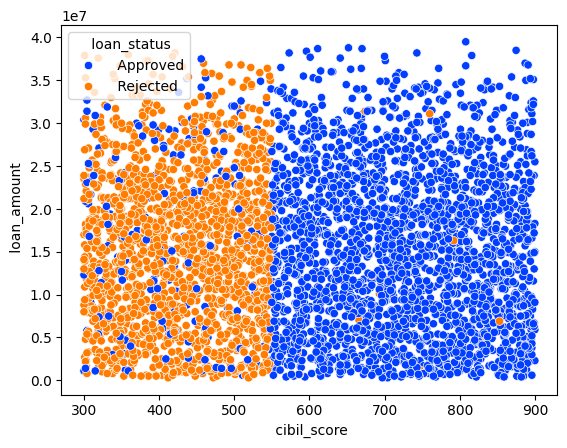

In [40]:
sns.scatterplot(data=hd_data, x=' cibil_score', y=' loan_amount', hue=' loan_status',palette="bright")

**Approximately 550 onwards cibil score for approved loan applications increase.**
**As the value of loan amount increases, number of loans decrease**

<Axes: xlabel=' cibil_score', ylabel=' income_annum'>

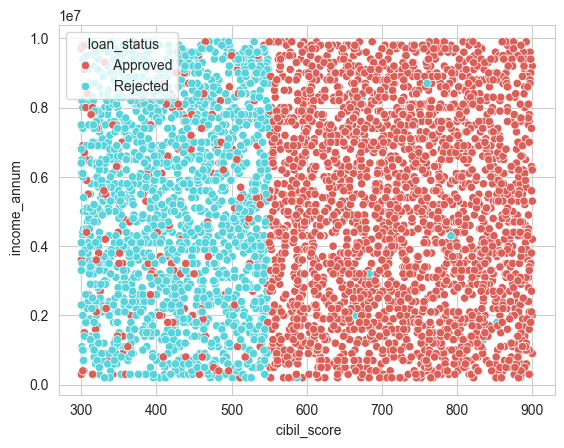

In [42]:
sns.scatterplot(data=hd_data, x=' cibil_score', y=' income_annum', hue=' loan_status',palette="hls")

**Approximately 550 of cibil score onwards approved loan applications increase irrespective of income**

<Axes: xlabel=' education', ylabel='count'>

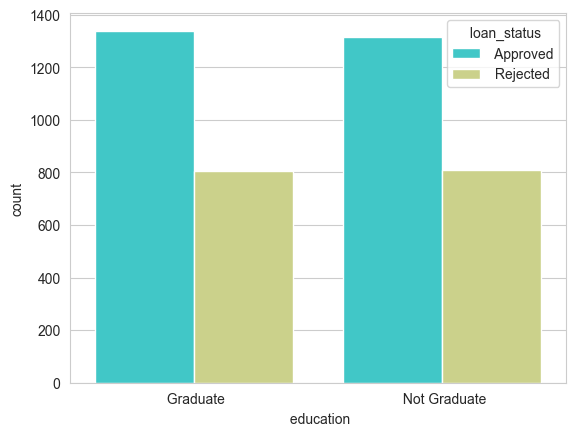

In [44]:
sns.countplot(x=' education',data=hd_data,hue=' loan_status',palette="rainbow")

**Both, graduates and not graduates have approximately same no.of loan approvals**

<Axes: xlabel=' self_employed', ylabel='count'>

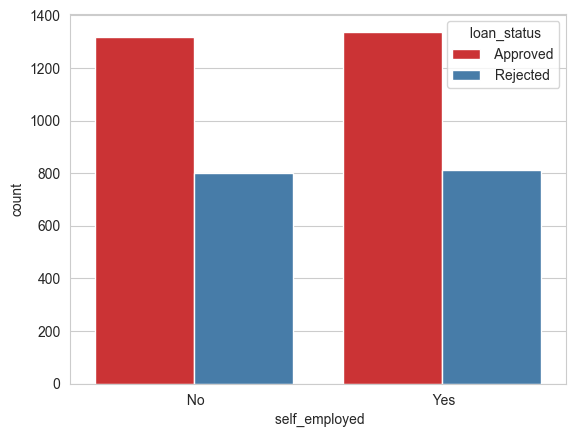

In [15]:
sns.countplot(x=' self_employed',data=hd_data,hue=' loan_status',palette='Set1')

**Both, self employed and not self employed have same number of loan approvals**

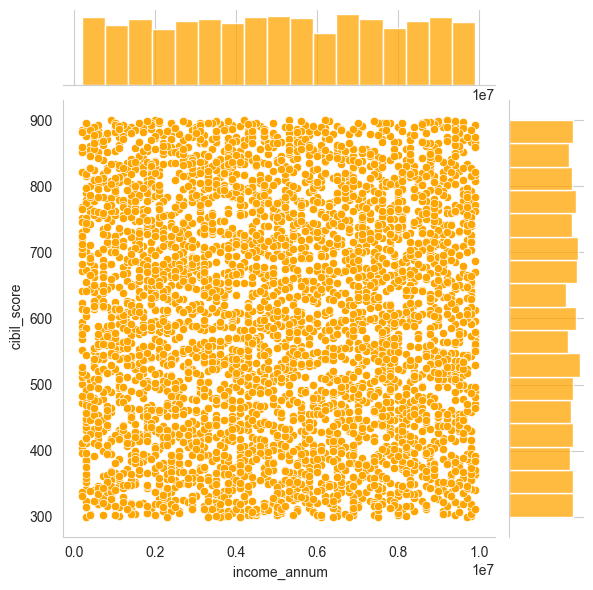

In [51]:
sns.jointplot(x=hd_data[' income_annum'],y=hd_data[' cibil_score'],kind='scatter',color="orange")
plt.grid()

**Cibil score and income annum are uniformly related**

<Axes: xlabel=' loan_term', ylabel=' cibil_score'>

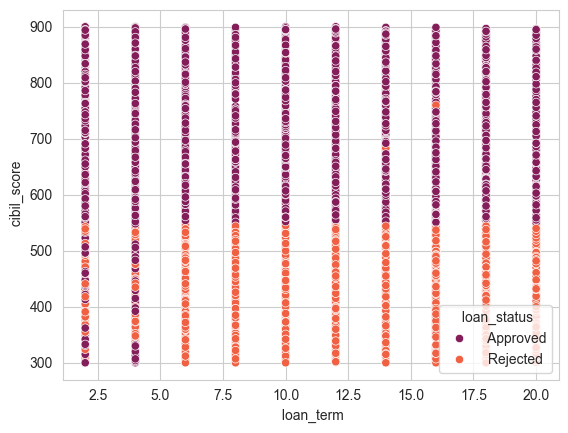

In [46]:
sns.scatterplot(data=hd_data, y=' cibil_score', x=' loan_term', hue=' loan_status',palette="rocket")

**Loan requests with (low cibil score and less loan terms) and high cibil score are approved**

<Axes: xlabel=' education', ylabel=' cibil_score'>

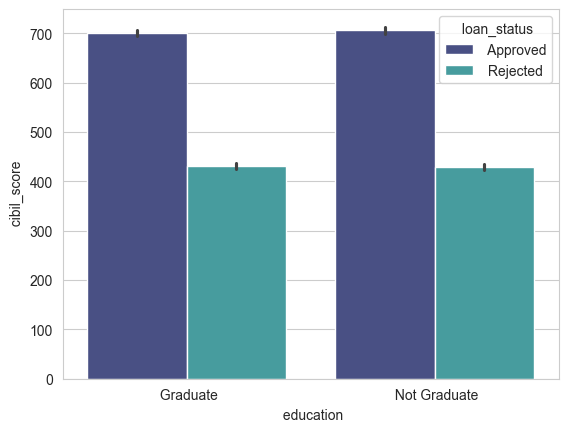

In [47]:
sns.barplot(data=hd_data,x=' education',y=' cibil_score',hue=' loan_status',palette="mako")

**Education does not significantly affect credit score for loan approvals**

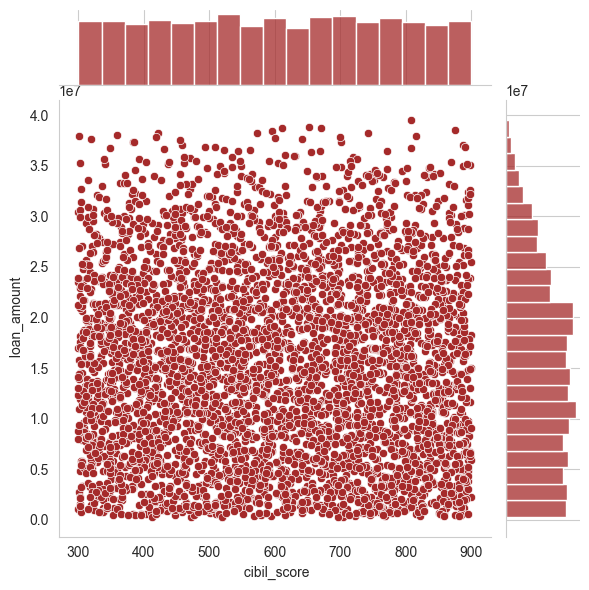

In [77]:
sns.jointplot(x=hd_data[' cibil_score'],y=hd_data[' loan_amount'],kind='scatter',color="brown")
plt.grid()

**As the value of loan amount increases, number of loans decrease**

C:\Users\DELL\AppData\Local\Temp\ipykernel_27820\2064721089.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hd_data,x=' no_of_dependents',y=' cibil_score',palette='rainbow')


<Axes: xlabel=' no_of_dependents', ylabel=' cibil_score'>

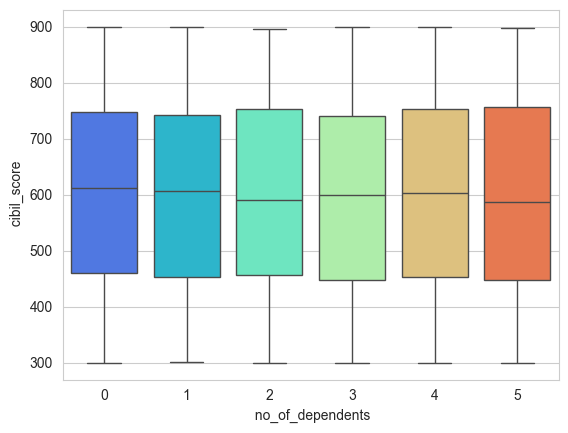

In [20]:
sns.boxplot(data=hd_data,x=' no_of_dependents',y=' cibil_score',palette='rainbow')

**Number of dependents and cibil score are directly dependent**

<Axes: xlabel=' no_of_dependents', ylabel=' cibil_score'>

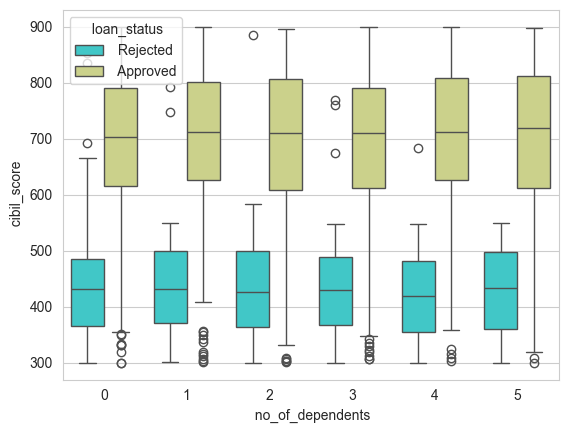

In [21]:
sns.boxplot(data=hd_data,x=' no_of_dependents',y=' cibil_score',palette='rainbow',hue=' loan_status')

**Number of dependents and cibil score are directly dependent. 
  More the cibil score, more are the number of approved loans**

<Axes: xlabel=' no_of_dependents', ylabel=' loan_amount'>

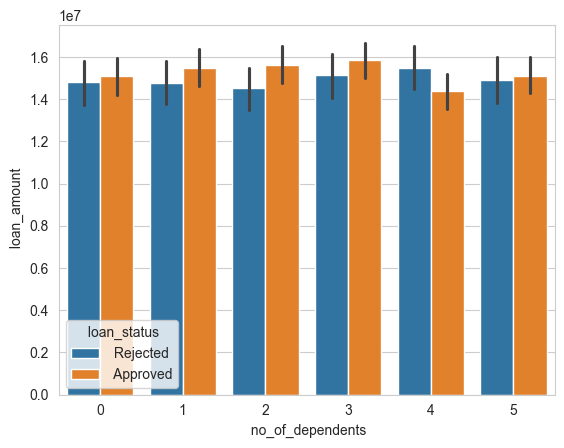

In [22]:
sns.barplot(data=hd_data,x=' no_of_dependents',y=' loan_amount',hue=' loan_status')

**only at number 4, the rejected loan requests is more**

## Data Processing

In [44]:
hd_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [45]:
hd_data.drop('loan_id',axis=1,inplace=True)

<Axes: >

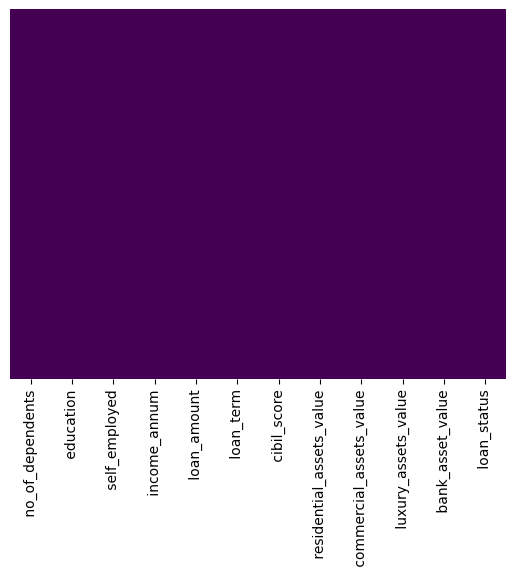

In [46]:
sns.heatmap(hd_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
hd_data[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [48]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

hd_data[' education']= label_encoder.fit_transform(hd_data[' education']) 
  
hd_data[' education'].unique() 

array([0, 1])

In [49]:
hd_data[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [50]:
hd_data[' self_employed']= label_encoder.fit_transform(hd_data[' self_employed'])   
hd_data[' self_employed'].unique() 

array([0, 1])

In [51]:
hd_data[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [52]:
hd_data[' loan_status']= label_encoder.fit_transform(hd_data[' loan_status'])   
hd_data[' loan_status'].unique() 

array([0, 1])

In [53]:
hd_data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [54]:
hd_data.corr()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246
luxury_assets_value,0.002817,-0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,0.015465


## Prediction

In [55]:
X = hd_data[[' loan_term',' income_annum',' loan_amount',' cibil_score']]
y = hd_data[' loan_status']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,f1_score
from sklearn.metrics import classification_report

In [58]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rfpred)
print("Random Forest Accuracy:", rf_acc)

#Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dtpred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dtpred)
print("Decision Tree accuracy:", dt_acc)

#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.9882903981264637
Decision Tree accuracy: 0.9847775175644028
Logistic Regression Accuracy: 0.7939110070257611
Naive Bayes Accuracy: 0.8056206088992974


In [59]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       555
           1       0.99      0.98      0.98       299

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [60]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       555
           1       0.97      0.98      0.98       299

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [61]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       555
           1       0.77      0.59      0.67       299

    accuracy                           0.79       854
   macro avg       0.79      0.75      0.76       854
weighted avg       0.79      0.79      0.79       854



In [62]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       555
           1       0.90      0.50      0.64       299

    accuracy                           0.81       854
   macro avg       0.84      0.73      0.75       854
weighted avg       0.82      0.81      0.79       854



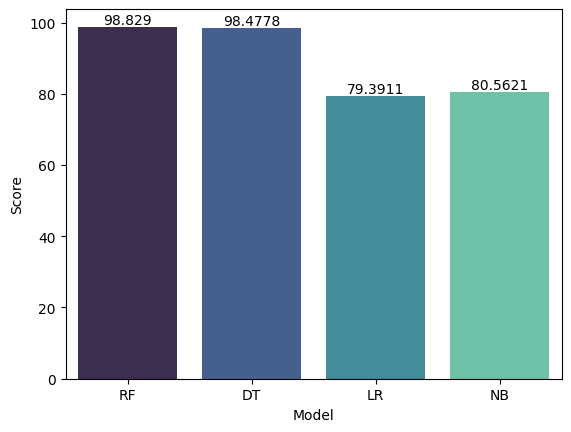

In [63]:
#Comparison of models
RF = accuracy_score(y_test,rfpred)*100
DT = accuracy_score(y_test,dtpred)*100
LR = accuracy_score(y_test,lr_pred)*100
NB = accuracy_score(y_test,nb_pred)*100

d = {'Model': ['RF','DT','LR','NB'],'Score': [RF,DT,LR,NB]}
plot = sns.barplot(data=d,x='Model',y='Score',palette="mako",hue='Model')
for i in plot.containers:
    plot.bar_label(i,)

In [64]:
 f1_score(y_test, rfpred)

0.9832214765100671

In [65]:
from sklearn.model_selection import cross_val_score, KFold

In [66]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rf, X, y, cv=kf)

In [67]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')

Cross-Validation Results (Accuracy): [0.98711944 0.98711944 0.98360656 0.98711944 0.98358734]


In [68]:
import pickle
pickle.dump(rf,open('loanap_rf.pkl','wb'))